# Vehicle Dataset
### a dataset contains records of number of used vehicles, its data fields are:
* `name`: Name of the vehicle
* `year`: year when the vehicle produced
* `selling_price`: the price of the vehicle
* `km_driven`: the distance travelled by the vehicle since produced
* `fuel`: the type of fuel it operates on
* `seller_type`: type of the seller
* `transmission`: transmission type of the vehicle
* `owner`: the order of ownership of the vehicle seller
* `mileage`: kilometers travelled by the vehicle for each liter of fuel
* `engine`: number of CC
* `max_power`: power of the vehicle in bhp
* `torque`: more info for the engine torque
* `seats`: number of seatsin the vehicle

## Author: Moamen Abdelrahman
### LinkedIn profile: https://www.linkedin.com/in/moamen-abdelrahman05/

# Data Wrangling

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# load in the dataset
df = pd.read_csv('Car details v3.csv')

In [3]:
# view few rows of the data
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [4]:
# polishing column names
df.columns = df.columns.str.replace('_', ' ').str.strip().str.title()

In [5]:
# view changes
df.head(3)

,Name,Year,Selling Price,Km Driven,Fuel,Seller Type,Transmission,Owner,Mileage,Engine,Max Power,Torque,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [6]:
# take a look at dtypes and some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           8128 non-null   object 
 1   Year           8128 non-null   int64  
 2   Selling Price  8128 non-null   int64  
 3   Km Driven      8128 non-null   int64  
 4   Fuel           8128 non-null   object 
 5   Seller Type    8128 non-null   object 
 6   Transmission   8128 non-null   object 
 7   Owner          8128 non-null   object 
 8   Mileage        7907 non-null   object 
 9   Engine         7907 non-null   object 
 10  Max Power      7913 non-null   object 
 11  Torque         7906 non-null   object 
 12  Seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#### `Mileage`, `Engine`, `Max Power` and `Seats` dtypes need to be fixed

In [7]:
# view some rows of `Mileage` column
df['Mileage'].head(3)

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
Name: Mileage, dtype: object

In [8]:
# extracting mileage from string to float
df['Mileage'] = df['Mileage'].str.split().str[0]

# convert values from str to float
df['Mileage'] = df['Mileage'].astype(float)

In [9]:
# view some rows of `Max Power` column
df['Max Power'].head(3)

0        74 bhp
1    103.52 bhp
2        78 bhp
Name: Max Power, dtype: object

In [10]:
# extracting max power from string
df['Max Power'] = df['Max Power'].str.split().str[0]

# assigning no-value cells to -1 to fix dtype issue while using `.astype()`
df.loc[ df['Max Power'] == 'bhp', 'Max Power'] = '-1'

# convert values from str to float
df['Max Power'] = df['Max Power'].astype(float)

In [11]:
# fillna in seats with -1 to fix dtype issue while using `.astype()`
df['Seats'].fillna(-1, inplace=True)

# convert values from str to int
df['Seats'] = df['Seats'].astype(int)

In [12]:
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           8128 non-null   object 
 1   Year           8128 non-null   int64  
 2   Selling Price  8128 non-null   int64  
 3   Km Driven      8128 non-null   int64  
 4   Fuel           8128 non-null   object 
 5   Seller Type    8128 non-null   object 
 6   Transmission   8128 non-null   object 
 7   Owner          8128 non-null   object 
 8   Mileage        7907 non-null   float64
 9   Engine         7907 non-null   object 
 10  Max Power      7913 non-null   float64
 11  Torque         7906 non-null   object 
 12  Seats          8128 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 793.9+ KB


In [13]:
# check duplicates in the data set
dupl = df.duplicated().sum()
print(f'{dupl} rows of the dataset are duplicated')

1202 rows of the dataset are duplicated


In [14]:
# drop these duplicated rows from the dataset
df.drop_duplicates(inplace=True, ignore_index=True)

#### check each column for inconsistency

In [15]:
# check null values in `Name` col
df['Name'].isnull().sum()

0

In [16]:
# check for inconsistency in `Year` col
df['Year'].describe()

count    6926.000000
mean     2013.420300
std         4.078286
min      1983.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2020.000000
Name: Year, dtype: float64

In [17]:
# check null values in `Year` col
df['Year'].isnull().sum()

0

In [18]:
# check for inconsistency in `Selling Price` col
df['Selling Price'].describe()

count    6.926000e+03
mean     5.172707e+05
std      5.197670e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.335000e+05
max      1.000000e+07
Name: Selling Price, dtype: float64

In [19]:
# setting price in $K to reduce digits
df['Selling Price'] /= 1000

In [20]:
# check null values in `Selling Price` col
df['Selling Price'].isnull().sum()

0

In [21]:
# check for inconsistency in `Km Driven` col
df['Km Driven'].describe()

count    6.926000e+03
mean     7.399568e+04
std      5.835810e+04
min      1.000000e+00
25%      4.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: Km Driven, dtype: float64

In [22]:
# check null values in `Km Driven` col
df['Km Driven'].isnull().sum()

0

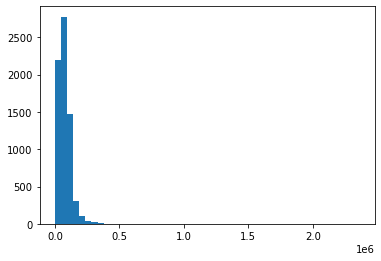

In [23]:
# take a look at distribution of `Km Driven` col
plt.hist(df['Km Driven'], bins=50);

In [24]:
# the first two values are pretty sure outliers!
df.sort_values(by=['Km Driven'], ascending=False)['Km Driven'][:10]

3161    2360457
1646    1500000
3183     577414
5744     500000
3284     500000
4411     475000
4485     440000
4737     426000
2080     380000
6104     376412
Name: Km Driven, dtype: int64

In [25]:
# drop the outliers
df = df.loc[ df['Km Driven'] < 1e+06 ]

# fix index after dropping
df.reset_index(drop=True, inplace=True)

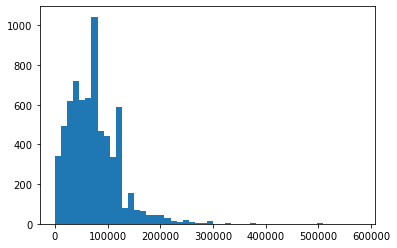

In [26]:
# take a look again
plt.hist(df['Km Driven'], bins=50);

In [27]:
# check for typos in `Fuel` col
df['Fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [28]:
# check null values in `Fuel` col
df['Fuel'].isnull().sum()

0

In [29]:
# check for typos in `Seller Type` col
df['Seller Type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [30]:
# check null values in `Seller Type` col
df['Seller Type'].isnull().sum()

0

In [31]:
# check for typos in `Transmission` col
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
# check null values in `Transmission` col
df['Transmission'].isnull().sum()

0

In [33]:
# check for typos in `Owner` col
df['Owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [34]:
# check null values in `Owner` col
df['Owner'].isnull().sum()

0

In [35]:
# how is there mileage of Zero!?
df['Mileage'].describe()

count    6716.000000
mean       19.466088
std         4.049388
min         0.000000
25%        16.800000
50%        19.440000
75%        22.500000
max        42.000000
Name: Mileage, dtype: float64

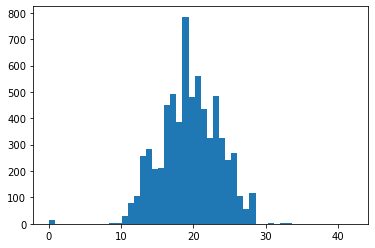

In [36]:
# take a look at distr. of `Mileage` col
plt.hist(df['Mileage'], bins=50);

In [37]:
# distr is normal so we can use either mean or median
mean_mileage = df['Mileage'].mean()

# replace each zero with the mean mileage
df.loc[ df['Mileage'] == 0, 'Mileage' ] = mean_mileage

In [38]:
# check null values in `Mileage` col
df['Mileage'].isnull().sum()

208

In [39]:
# fill the nan's with the mean mileage
df['Mileage'].fillna(mean_mileage, inplace=True)

In [40]:
# check the format of the `Engine` col
df['Engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [41]:
# extract number of CC from string
df['Engine'] = df['Engine'].str.split().str[0]

In [42]:
# rename the column for clarity
df.rename(columns={'Engine':'Engine (in CC)'}, inplace=True)

In [43]:
# check null values in `Engine (in CC)` col
df['Engine (in CC)'].isnull().sum()

208

In [44]:
# check for inconsistency in `Max Power` col
df['Max Power'].describe()

count    6719.000000
mean       87.706811
std        31.785934
min        -1.000000
25%        67.100000
50%        81.830000
75%       100.000000
max       400.000000
Name: Max Power, dtype: float64

In [45]:
# check for inconsistent values
df.loc[ df['Max Power'] <= 0 ]

,Name,Year,Selling Price,Km Driven,Fuel,Seller Type,Transmission,Owner,Mileage,Engine (in CC),Max Power,Torque,Seats
547,Maruti Alto K10 LXI,2011,204.999,97500,Petrol,Individual,Manual,First Owner,19.466088,NaN,0.0,NaN,-1
1309,Maruti Swift Dzire VDI Optional,2017,589.000,41232,Diesel,Dealer,Manual,First Owner,19.466088,NaN,0.0,NaN,-1
2351,Tata Indica Vista Quadrajet LS,2012,240.000,70000,Diesel,Individual,Manual,First Owner,19.466088,NaN,0.0,NaN,-1
4271,Maruti Omni CNG,2000,80.000,100000,CNG,Individual,Manual,Second Owner,10.900000,796,-1.0,NaN,8


In [46]:
# assigning -1's and 0's as nan
df.loc[ df['Max Power'] <= 0, 'Max Power'] = math.nan

In [47]:
# check for null values in `Max Power` col
df['Max Power'].isnull().sum()

209

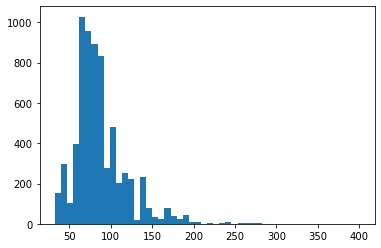

In [48]:
# take a look at the distr. of `Max Power` col
plt.hist(df['Max Power'], bins=50);

In [49]:
# it's skewed, so median is better to fill nan's
med_power = df['Max Power'].median()
df['Max Power'].fillna(med_power, inplace=True)

In [50]:
# check changes
df['Max Power'].isnull().sum()

0

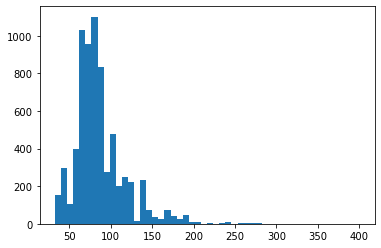

In [51]:
# check changes
plt.hist(df['Max Power'], bins=50);

In [52]:
# check null values in `Torque` col
df['Torque'].isnull().sum()

209

In [53]:
# check for inconsistency in `Seats` col
df['Seats'].unique()

array([ 5,  4, -1,  7,  8,  6,  9, 10, 14,  2])

In [54]:
# assign -1's as nan
df.loc[ df['Seats'] == -1, 'Seats'] = math.nan

In [55]:
# check null values in `Seats` col
df['Seats'].isnull().sum()

208

In [56]:
# view the frequency of each number of seats
df['Seats'].value_counts()

5.0     5253
7.0      965
8.0      222
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: Seats, dtype: int64

In [57]:
# choose the mode value to fill with the nan's
mode_seats = df['Seats'].value_counts().index[0]
df['Seats'].fillna(mode_seats, inplace=True)

In [58]:
# check changes
df['Seats'].isnull().sum()

0

In [59]:
# check null values for each col
df.isnull().sum()

Name                0
Year                0
Selling Price       0
Km Driven           0
Fuel                0
Seller Type         0
Transmission        0
Owner               0
Mileage             0
Engine (in CC)    208
Max Power           0
Torque            209
Seats               0
dtype: int64

In [60]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            6924 non-null   object 
 1   Year            6924 non-null   int64  
 2   Selling Price   6924 non-null   float64
 3   Km Driven       6924 non-null   int64  
 4   Fuel            6924 non-null   object 
 5   Seller Type     6924 non-null   object 
 6   Transmission    6924 non-null   object 
 7   Owner           6924 non-null   object 
 8   Mileage         6924 non-null   float64
 9   Engine (in CC)  6716 non-null   object 
 10  Max Power       6924 non-null   float64
 11  Torque          6715 non-null   object 
 12  Seats           6924 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 703.3+ KB


In [61]:
# check percentage of null values that aren't fixable, so we can decide whether to drop
pct = df.isnull().sum().sum() / df.shape[0]*100
print(f'{pct: .1f}% of our data are null values')

 6.0% of our data are null values


In [62]:
# drop the remaining nan's from the dataset
df.dropna(inplace=True)

# fix index after dropping
df.reset_index(drop=True, inplace=True)

In [63]:
# check the whole dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6715 entries, 0 to 6714
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            6715 non-null   object 
 1   Year            6715 non-null   int64  
 2   Selling Price   6715 non-null   float64
 3   Km Driven       6715 non-null   int64  
 4   Fuel            6715 non-null   object 
 5   Seller Type     6715 non-null   object 
 6   Transmission    6715 non-null   object 
 7   Owner           6715 non-null   object 
 8   Mileage         6715 non-null   float64
 9   Engine (in CC)  6715 non-null   object 
 10  Max Power       6715 non-null   float64
 11  Torque          6715 non-null   object 
 12  Seats           6715 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 682.1+ KB


In [64]:
# convert dtype of `Enngine (in CC)` col from str to int
df['Engine (in CC)'] = df['Engine (in CC)'].astype(int)

In [65]:
# convert `Seats` col from float to int
df['Seats'] = df['Seats'].astype(int)

In [66]:
# rename `Selling Price` col for clarity
df.rename(columns={'Selling Price':'Selling Price in $k'}, inplace=True)

In [67]:
# check for typos in `Owner` col
df['Owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [68]:
# make a comare function to use in creating new col
def comp(x):
    y = x.split()[0]
    if y == 'First': return '1'
    elif y == 'Second': return '2'
    elif y == 'Third': return '3'
    elif y == 'Test': return 'T'
    else: return '4+'

In [69]:
# create new col representing each category in `Owner` col with a shorter str
df['Owner V2'] = df['Owner'].map(comp)

In [70]:
# view sample of the new col
df[ ['Owner', 'Owner V2'] ].head()

,Owner,Owner V2
0,First Owner,1
1,Second Owner,2
2,Third Owner,3
3,First Owner,1
4,First Owner,1


### Now, data is ready for our exploration!

# Exploratory Data Analysis (EDA)

## 1 - Time trend for selling prices of each ownership degree

In [71]:
# split dataset into four groups, one for each ownership category
Owner_1 = df.loc[ df['Owner V2'] == '1' ].groupby('Year')['Selling Price in $k'].mean()
Owner_2 = df.loc[ df['Owner V2'] == '2' ].groupby('Year')['Selling Price in $k'].mean()
Owner_3 = df.loc[ df['Owner V2'] == '3' ].groupby('Year')['Selling Price in $k'].mean()
Owner_4 = df.loc[ df['Owner V2'] == '4+' ].groupby('Year')['Selling Price in $k'].mean()

# make list of ownership labels to use as legend
labels = df['Owner'].unique()[:4]

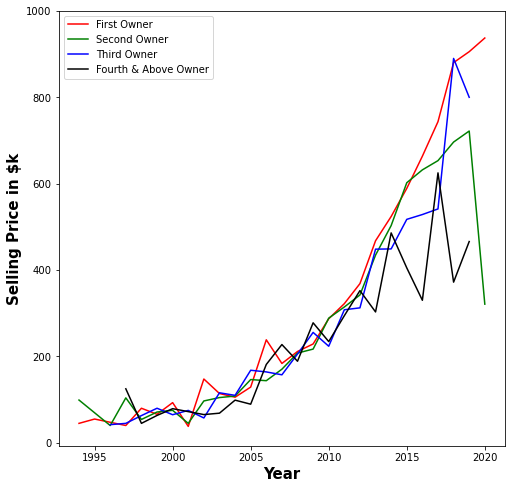

In [72]:
# plot our time trend
plt.figure(figsize=(8,8))

plt.plot(Owner_1.index, Owner_1.values, 'r', label=labels[0])
plt.plot(Owner_2.index, Owner_2.values, 'g', label=labels[1])
plt.plot(Owner_3.index, Owner_3.values, 'b', label=labels[2])
plt.plot(Owner_4.index, Owner_4.values, 'k', label=labels[3])
plt.ylim(top = 1000)
plt.legend()
plt.xlabel('Year', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Selling Price in $k', fontdict={'size':15, 'weight':'bold'})

plt.show()

## 2 - Is there a seller type who dominates selling the more expensive cars than others, concerning each ownership degree (in first & second owners)?

In [73]:
# group our data by `Seller Type` and `Owner V2` cols, with the mean selling price
test = df.groupby(by=['Seller Type', 'Owner V2'])['Selling Price in $k'].mean()
test

Seller Type       Owner V2
Dealer            1            952.743401
                  2            651.452333
                  3            296.250000
                  T           4403.800000
Individual        1            566.571966
                  2            381.464043
                  3            289.698391
                  4+           231.970916
Trustmark Dealer  1            734.958333
                  2            583.333333
Name: Selling Price in $k, dtype: float64

In [74]:
# make some variables to ease plotting
types = df['Seller Type'].unique()
owners = df['Owner'].unique()[:2]

x = np.arange(1,len(owners)+1)
width = 0.25
multi = -1

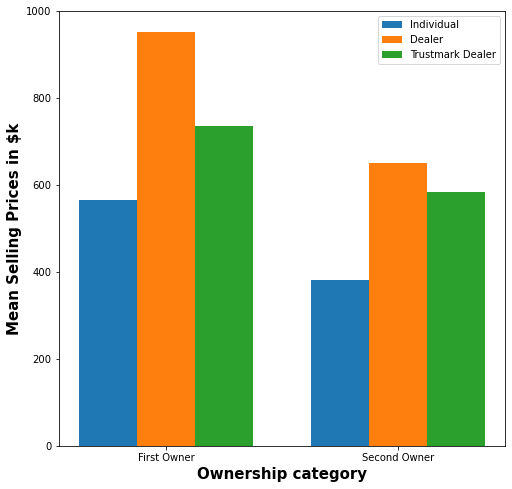

In [75]:
# plot clustered bar graph for our focus data
plt.figure(figsize=(8,8))

for i, v in enumerate(types):
    plt.bar(x+width*multi, test[v][:2], width=width, label=v)
    multi += 1

plt.xticks(np.arange(1,3), owners)
plt.xlabel('Ownership category', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Mean Selling Prices in $k', fontdict={'size':15, 'weight':'bold'})
plt.legend()

plt.show()

## 3 - Time trend of quantity produced of each transmission type

In [76]:
# group our data by `Transmission` and `Year` cols, with counts of records in each category
test = df.groupby(['Transmission', 'Year'])['Name'].count()

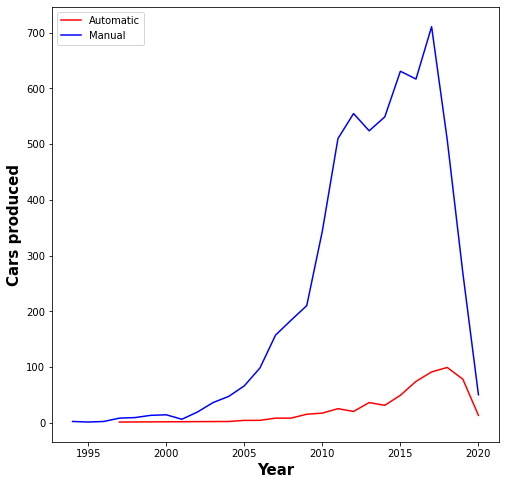

In [77]:
# plot time trend of our focus data
plt.figure(figsize=(8,8))

plt.plot(test['Automatic'].index, test['Automatic'].values, 'r', label='Automatic')
plt.plot(test['Manual'].index, test['Manual'].values, 'b', label='Manual')

plt.xlabel('Year', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Cars produced', fontdict={'size':15, 'weight':'bold'})
plt.legend()
plt.show()

## 4 - Time trend of each transmission type selling prices

In [78]:
# group our data by `Transmission` and `Year` cols, with mean selling price
test2 = df.groupby(['Transmission', 'Year'])['Selling Price in $k'].mean()

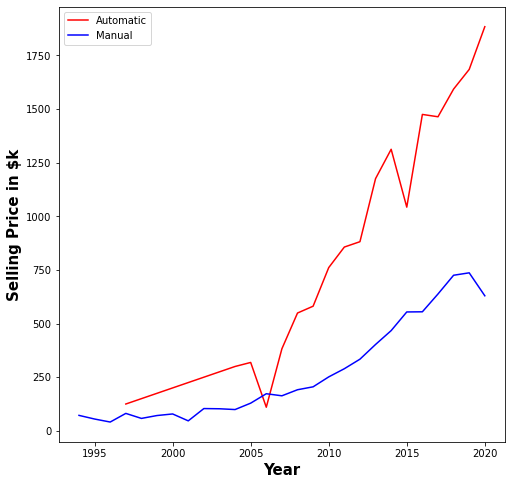

In [79]:
# plot time trend of our focus data
plt.figure(figsize=(8,8))

plt.plot(test['Automatic'].index, test2['Automatic'].values, 'r', label='Automatic')
plt.plot(test['Manual'].index, test2['Manual'].values, 'b', label='Manual')

plt.xlabel('Year', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Selling Price in $k', fontdict={'size':15, 'weight':'bold'})
plt.legend()
plt.show()

## 5 - Do a transmission type vehicles' drivers tend to drive more than others?

In [80]:
# create new col to represent the mean km driven in each year from production untill 2021
df['Km Driven per Year'] = df['Km Driven']/(2021-df['Year'])

In [81]:
# view few rows to check changes
df.head()

,Name,Year,Selling Price in $k,Km Driven,Fuel,Seller Type,Transmission,Owner,Mileage,Engine (in CC),Max Power,Torque,Seats,Owner V2,Km Driven per Year
0,Maruti Swift Dzire VDI,2014,450.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,1,20785.714286
1,Skoda Rapid 1.5 TDI Ambition,2014,370.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,2,17142.857143
2,Honda City 2017-2020 EXi,2006,158.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,3,9333.333333
3,Hyundai i20 Sportz Diesel,2010,225.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,1,11545.454545
4,Maruti Swift VXI BSIII,2007,130.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,1,8571.428571


In [82]:
# group our data with `Transmission` col, with mean Km Driven per Year
trans = df.groupby('Transmission')['Km Driven per Year'].mean()
trans

Transmission
Automatic     9313.005333
Manual       10820.956915
Name: Km Driven per Year, dtype: float64

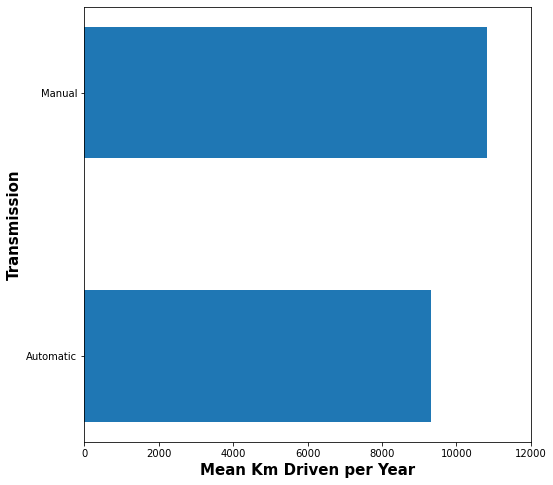

In [83]:
# plot a horizontal bar graph of our focus data
plt.figure(figsize=(8,8))

plt.barh(trans.index, trans.values, height=0.5)

plt.xlabel('Mean Km Driven per Year', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Transmission', fontdict={'size':15, 'weight':'bold'})
plt.xlim(right=12000)

plt.show()

## 6 - Which car size is consumed in driving most?

In [84]:
# group our data by `Seats` col, with mean Km Driven per Year
test = df.groupby('Seats')['Km Driven per Year'].mean()

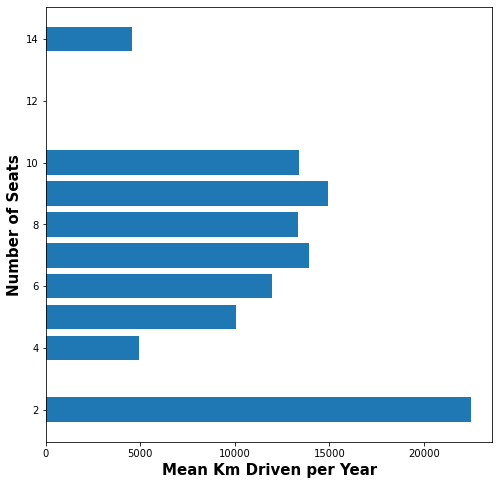

In [85]:
# plot a horizontal bar graph of our focus data
plt.figure(figsize=(8,8))

plt.barh(test.index, test.values)

plt.ylabel('Number of Seats', fontdict={'size':15, 'weight':'bold'})
plt.xlabel('Mean Km Driven per Year', fontdict={'size':15, 'weight':'bold'})

plt.show()

## 7 - Time trend of vehicles selling prices, concerning fuel types

In [86]:
# group our data by `Fuel` and `Year` col, with mean Selling Price
test = df.groupby(['Fuel', 'Year'])['Selling Price in $k'].mean()
test

Fuel    Year
CNG     2008    120.000000
        2010    188.333333
        2011    198.500000
        2012    221.400000
        2013    219.666667
                   ...    
Petrol  2016    445.550129
        2017    547.054598
        2018    583.707194
        2019    760.805380
        2020    595.666619
Name: Selling Price in $k, Length: 69, dtype: float64

In [87]:
# make some variables to ease plotting
fuels = df['Fuel'].unique()
colors = ['r', 'g', 'b', 'k']

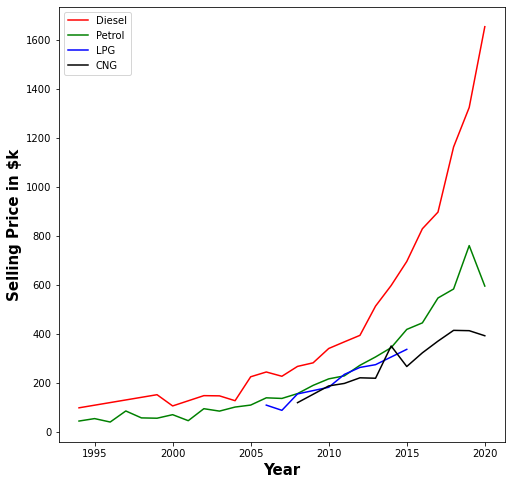

In [88]:
# plot time trend of our focus data
plt.figure(figsize=(8,8))

for f,c in zip(fuels, colors):
    plt.plot(test[f].index, test[f].values, label=f, color=c)

plt.xlabel('Year', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Selling Price in $k', fontdict={'size':15, 'weight':'bold'})
    
plt.legend()
plt.show()

## 8 - Which transmission type dominates each car size (in number of seats)?

In [89]:
# group our data by `Transmission` col, with counts of each number of seats
test = df.groupby(['Transmission'])['Seats'].value_counts()
test

Transmission  Seats
Automatic     5         457
              7          92
              8          14
              4          12
Manual        5        4796
              7         873
              8         207
              4         112
              9          74
              6          57
              10         18
              2           2
              14          1
Name: Seats, dtype: int64

In [90]:
# make some variables to ease plotting
trans = df['Transmission'].unique()
seats = df['Seats'].unique()

multi = -0.5

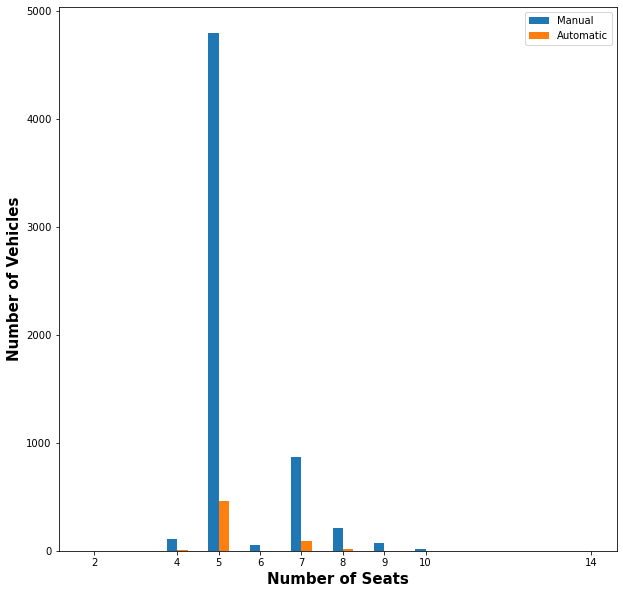

In [91]:
# plot a clustered bar graph of our focus data
plt.figure(figsize=(10,10))

for i in trans:
    plt.bar(test[i].index+multi*width, test[i].values, width=width, label=i)
    multi *= -1

plt.xticks(seats)
plt.xlabel('Number of Seats', fontdict={'size':15, 'weight':'bold'})
plt.ylabel('Number of Vehicles', fontdict={'size':15, 'weight':'bold'})

plt.legend()
plt.show()

# Thanks for your interest!
## I hope you share me your feedback at: https://www.linkedin.com/in/moamen-abdelrahman05/